In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Midterm Review

Guidelines for the midterm:
1. This is an individual effort, do not work with others.
1. You can copy code from the notes or your own homework but other sources is considered plaigerism.
1. Do not use piazza for the duration of the exam, it will be frozen!
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the midterm will result in a 10% reduction every **HOUR** that it is late.  If you feel that there is a special circumstance that warrants consideration tells us BEFORE the Tuesday (and more so before the exam starts).

Good luck!

## Question 1
Euler's constant $\gamma = 0.5772156\ldots$ is defined as the limit

$$ \gamma = \lim_{n \rightarrow \infty} \gamma_n$$

where 

$$\gamma_n = 1 + \frac{1}{2} + \frac{1}{3} + \cdots + \frac{1}{n} - \ln n.$$

Assuming that $\gamma - \gamma_n \approx c n^{-d},~n \rightarrow \infty$, for some constants $c$ and $d > 0$, determine $c$ and $d$ by experimenting computationally.

We can compute the function $\gamma - \gamma_n$ and fit the function $cn^{-d}$ to it by taking the log of the data.

$$\begin{aligned}
    g(n) &= \gamma - \gamma_n \\
         &= c n^{-d} \\
    \log g(n) &= \log c - d \log n
\end{aligned}$$

This we can fit using a least squares fit if we re-identify the variable $\hat{c} = \log c$ we then have

$$\begin{bmatrix}
    1 & - \log n_1 \\
    1 & - \log n_2 \\
    \vdots & \vdots \\
    1 & - \log n_k 
\end{bmatrix} \begin{bmatrix} \hat{c} \\ d \end{bmatrix} =
\begin{bmatrix}
    \log g(n_1) \\
    \log g(n_2) \\
    \vdots \\
    \log g(n_k)
\end{bmatrix}$$

where we have assumed we have $k$ points.  This is a $k \times 2$ matrix so is not directly computable but we can define the least-squares problem.

(99, 2) (99,)


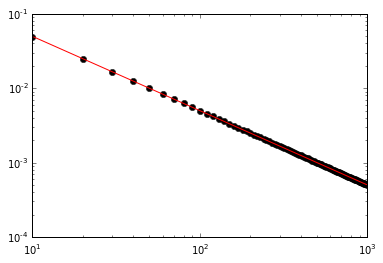

In [35]:
def gamma_n(n):
    gamma_sum = 0.0
    for i in xrange(1, n+1):
        gamma_sum += 1.0 / float(i)
    return gamma_sum - numpy.log(n)

N = numpy.array(range(10, 1000, 10))
error = numpy.empty(N.shape[0])
for (i, n) in enumerate(N):
    error[i] = numpy.abs(numpy.euler_gamma - gamma_n(n))
    
# Construct coefficient matrix
A = numpy.ones((N.shape[0], 2))
A[:, 1] = -numpy.log(N)
coeff = numpy.linalg.lstsq(A, numpy.log(error))[0]
c = numpy.exp(coeff[0])
d = coeff[1]
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(N, error, 'ko')
axes.plot(N, c*N**(-d),'r-')

plt.show()

## Question 2
Let $f(x) = (n+1)x - 1$.  The iteration

$$x_k = f(x_{k-1}), ~k=1,2,\ldots,K; ~x_0 = 1/n$$

in exact arithmetic converges to the fixed point $1/n$ in one step.  Explain why this is.  Now compute this in finite arithmetic with $n=1,2,3,4,5$ and `K= xrange(10:50:10)` and explain what you observe.

By evaluating the fixed point we can see that the exact representation of the fixed point will lead to an exact answer.  In finite arithmetic this is not always the case unless $1/n$ is representable in the finite arithmetic.

0.02
0.02
0.02
0.0200000000024
0.0200000001202
0.0200000061289
0.0200003125729
0.020015941216
0.0208130020136
0.0614631026951
2.13461823745
107.86553011
5500.14203561
280506.243816
14305817.4346
729596688.165
37209431095.4
1.89768098587e+12
9.67817302792e+13
4.93586824424e+15
2.51729280456e+17
1.28381933033e+19
6.54747858466e+20
3.33921407818e+22
1.70299917987e+24
8.68529581734e+25
4.42950086684e+27
2.25904544209e+29
1.15211317547e+31
5.87577719488e+32
2.99664636939e+34
1.52828964839e+36
7.79427720678e+37
3.97508137546e+39
2.02729150148e+41
1.03391866576e+43
5.27298519536e+44
2.68922244963e+46
1.37150344931e+48
6.99466759149e+49
3.56728047166e+51
1.81931304055e+53
9.27849650679e+54
4.73203321846e+56
2.41333694142e+58
1.23080184012e+60
6.27708938462e+61
3.20131558616e+63
1.63267094894e+65
8.3266218396e+66
0.0166666666667
0.0166666666667
0.0166666666664
0.0166666666532
0.0166666658468
0.0166666166565
0.0166636160477
0.016480578909
0.00531531344647
-0.675765879765
-42.2217186657
-2576.524

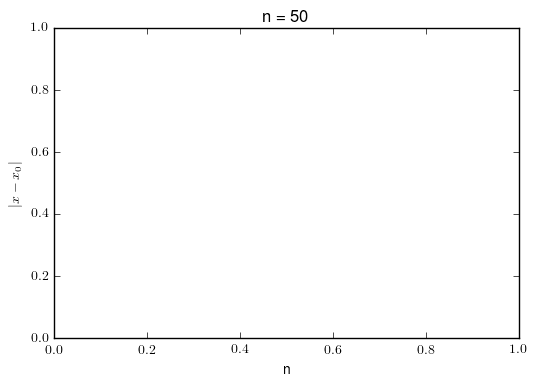

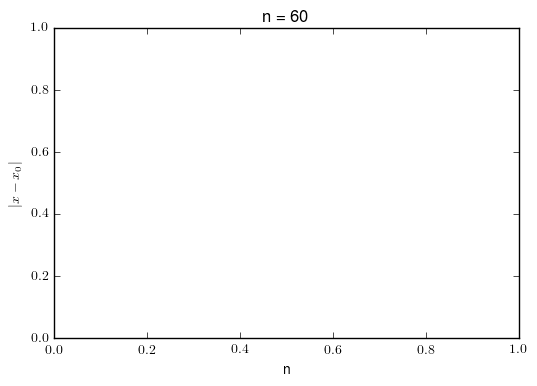

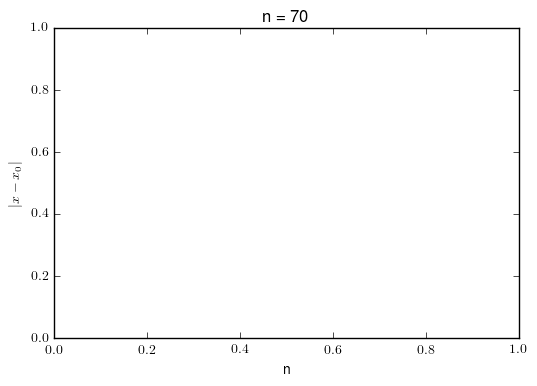

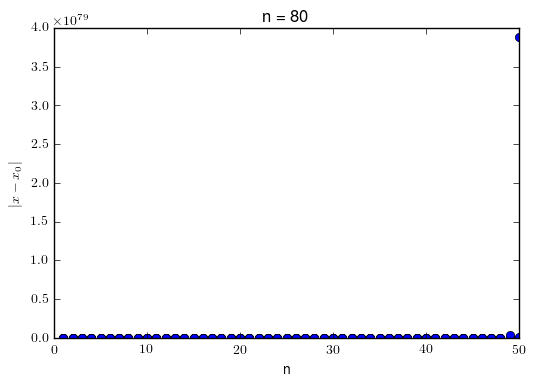

In [26]:
f = lambda n, x: (n + 1.0) * x - 1

axes = []
N_range = range(50, 100, 10)
for i in xrange(4):
    fig = plt.figure()
    axes.append(fig.add_subplot(1, 1, 1))
    axes[i].set_xlabel("n")
    axes[i].set_ylabel("$|x - x_0|$")
    axes[i].set_title("n = %s" % N_range[i])
    
for n in N_range:
    x = 1.0 / float(n)
    for k in xrange(50):
        x = f(n, x)
        print x
        axes[i].plot(k + 1, numpy.abs(x - 1.0 / float(n)), 'bo')

plt.show()
    

## Question 3
Consider the equation

$$\frac{x}{2} - \sin x = 0$$

Show that the only positive root is located in the interval $x\in[\frac{1}{2}\pi,\pi]$.

Compute the root to $10^{-7}$, $10^{-15}$ accuracy using
1. Bisection with starting values $[\frac{1}{2} \pi, \pi]$
1. Secant method with same starting values
1. Newton's method with $x_0 = \frac{1}{2} \pi$.

Write a function that returns the number of iterations needed for a given tolerance.

Define the function $f(x) = \frac{x}{2} - \sin x$.  By evaluation the function is positive and negative on either side of the bracket:

$f(\pi/2) = \frac{\pi}{4} - \sin \frac{\pi}{2} = \frac{\pi}{4} - 1 < 0$

$f(\pi) = \frac{\pi}{2} - \sin \pi = \frac{\pi}{2} - 0 > 0$

To show that there are no other zeros we can show that the function never flips sign, i.e. is bounded from below by a function.  One key observation is that the average slope of the function is $\frac{1}{2}$, allow for this we can construct a line that bounds the function $f(x)$ from below as

$y = \frac{1}{2} x - 1$

where the y-intercept is derived by looking at the minimum of the function in one period of the $\sin x$, i.e. at $x=3\pi/2$.  This shows that $f(x) > \frac{1}{2} x - 1 ~~~~\forall x > 0$.  Since there is of course only one zero for the linear function $f(x)$ has only on zero when $x > 0$.

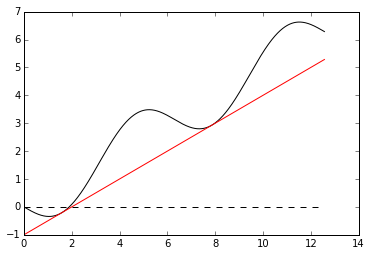

In [47]:
f = lambda x: x / 2.0 - numpy.sin(x)
x = numpy.linspace(0, 4.0 * numpy.pi, 1000)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x),'k')
axes.plot(x, 0.5*x - 1,'r')
axes.plot(x, numpy.zeros(x.shape[0]), 'k--')

## Question 4
Bernoulli's equation for fluid flow in an open channel with a small bump is

$$\frac{Q^2}{2gw^2h_0^2} + h_0 = \frac{Q^2}{2gw^2h^2} + h + H$$

where

$Q = 1.2~\text{m}^3/\text{s} =$ volume rate of flow

$g = 9.81 \text{m}/\text{s}^2 = $ gravitational acceleration

$w = 1.8 \text{m} = $ width of channel

$h_0 = 0.6 \text{m} = $ upstream water level

$H = 0.075 \text{m} = $ height of bump

$h = $ water level above the bump.

Determine $h$ to `1e-3` precision.

(0.2631152099535003, 4)
(0.49600107497234686, 3)


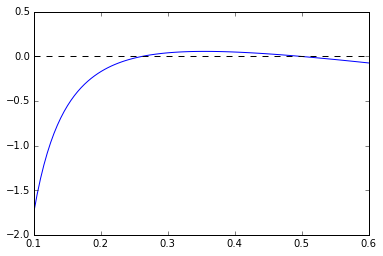

In [55]:
def f(h):
    Q = 1.2
    g = 9.91
    w = 1.8
    h_0 = 0.6
    H = 0.075
    return Q**2 / (2.0 * g * w**2) * (1.0 / (h_0**2) -  1.0 / h**2) + h_0 - h - H


def secant(bracket, f, tolerance=1e-3):
    # Algorithm parameters
    MAX_STEPS = 100
        
    # Initial guess
    x_k = bracket[0]
    x_km = bracket[1]

    success = False
    for n in xrange(1, MAX_STEPS + 1):
        x_kp = x_k - f(x_k) * (x_k - x_km) / (f(x_k) - f(x_km))
        x_km = x_k
        x_k = x_kp
        if numpy.abs(f(x_k)) < tolerance:
            success = True
            break
            
    if not success:
        return None, -1
    
    return x_k, n

print secant([0.2, 0.3], f)
print secant([0.4, 0.6], f)

h = numpy.linspace(0.1, 0.6, 100)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(h, f(h))
axes.plot(h, numpy.zeros(h.shape), 'k--')
plt.show()

## Question 5
The *Littlewood-Salem-Izumi* constant $\alpha_0$ is defined as the unique solution where $0 < \alpha < 1$ of 

$$ \int^{3 \pi / 2}_{0} \frac{\cos t}{t^\alpha} dt = 0.$$

See http://www.jstor.org/stable/40590375?seq=4#page_scan_tab_contents

**(a)** If we wanted to use Newton's method and Gauss-Legendre 2-point quadrature to compute $\alpha_0$ what functions $f(x)$ and $f'(x)$ should we define to run the Newton iteration?  Note that here we are using a single partition of the interval $[0, 3 \pi / 2]$ for the quadrature rule.

Define the mapping

$t = \frac{3 \pi}{4} (\xi + 1)$

and apply the Gauss-Legendre 2-point rule as

$$\begin{aligned}
    f(\alpha) &= \int^{3 \pi / 2}_{0} \frac{\cos t}{t^\alpha} dt =\int^1_{-1} \frac{\cos\left(\frac{3 \pi}{4} (\xi + 1)\right)}{\left[\frac{3 \pi}{4} (\xi + 1)\right]^\alpha} \frac{3 \pi}{4} d\xi \\
    &= \frac{3 \pi}{4} \left[ w_1 \frac{\cos\left(\frac{3 \pi}{4} (\xi_1 + 1)\right)}{\left[\frac{3 \pi}{4} (\xi_1 + 1)\right]^\alpha} + w_2 \frac{\cos\left(\frac{3 \pi}{4} (\xi_2 + 1)\right)}{\left[\frac{3 \pi}{4} (\xi_2 + 1)\right]^\alpha} \right ]
\end{aligned}$$

where $\xi_{1,2} = \pm\sqrt{\frac{1}{3}}$ and $w_{1,2} = 1$ defining $f(\alpha)$.

To find the derivative we want to take the derivative of the above function keeping in mind that 

$$\frac{\text{d}}{\text{d}\alpha} \frac{1}{\eta^\alpha} = -\frac{\ln \eta}{\eta^\alpha}$$

$$\begin{aligned}
    f'(\alpha) &=\frac{3 \pi}{4} \left[\cos\left(\frac{3 \pi}{4} (\xi_1 + 1)\right) \frac{\text{d}}{\text{d}\alpha} \left( \frac{1}{\left[\frac{3 \pi}{4} (\xi_1 + 1)\right]^\alpha} \right) + \cos\left(\frac{3 \pi}{4} (\xi_2 + 1)\right) \frac{\text{d}}{\text{d}\alpha} \left(\frac{1}{\left[\frac{3 \pi}{4} (\xi_2 + 1)\right]^\alpha} \right) \right ] \\
    &= -\frac{3 \pi}{4} \left[\cos\left(\frac{3 \pi}{4} (\xi_1 + 1)\right) \left( \frac{\ln \left[\frac{3 \pi}{4} (\xi_1 + 1)\right]}{\left[\frac{3 \pi}{4} (\xi_1 + 1)\right]^\alpha} \right) + \cos\left(\frac{3 \pi}{4} (\xi_2 + 1)\right) \left(\frac{\ln \left[\frac{3 \pi}{4} (\xi_2 + 1)\right]}{\left[\frac{3 \pi}{4} (\xi_2 + 1)\right]^\alpha} \right) \right ]
\end{aligned}$$

**(b)** Implement the above scheme to compute $\alpha$ by writing a function that takes in an initial guess and a tolerance that sets the stopping criteria such that if the difference between subsequent iterates is below this tolerance the iteration will stop.

In [16]:
def LSI_constant(alpha, tolerance):
    ### BEGIN SOLUTION
    xi_1 = 3.0 * numpy.pi / 4.0 * (-numpy.sqrt(1.0 / 3.0) + 1.0)
    xi_2 = 3.0 * numpy.pi / 4.0 * ( numpy.sqrt(1.0 / 3.0) + 1.0)
    f = lambda alpha: 3.0 * numpy.pi / 4.0 * ((numpy.cos(xi_1)) / (xi_1)**alpha + (numpy.cos(xi_2)) / (xi_2)**alpha)
    f_prime = lambda alpha: -3.0 * numpy.pi / 4.0 * (numpy.cos(xi_1) * numpy.log(xi_1) / xi_1**alpha + numpy.cos(xi_2) * numpy.log(xi_2) / xi_2**alpha)

    MAX_STEPS = 1000
    success = False
    for n in xrange(MAX_STEPS):
        alpha_old = alpha
        alpha = alpha - f(alpha) / f_prime(alpha)
        if numpy.abs(alpha_old - alpha) < tolerance:
            success = True
            break
            
    if not success:
        raise Exception("Iteration did not converge!")
    ### END SOLUTION
    
    return alpha

print LSI_constant(31.0 / 100.0, 1e-6)

0.32947215594


## Question 6
Find the 2nd order, central difference based  2-dimensional differential quantities.  Make sure to consider the case where $\Delta x \neq \Delta y$ and use notation such that

$$f(x_i, y_j) = f_{i,j}$$

**(a)** $\nabla \cdot \vec{f}(\vec{x}) = \text{div}( \vec{f}(\vec{x}) ):= \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}$

$$\nabla \cdot \vec{f} \approx \frac{f_{i+1,j} - f_{i-1,j}}{2 \Delta x} + \frac{f_{i,j+1} - f_{i,j-1}}{2 \Delta y}$$

**(b)** $\Delta( f ):= \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$

$$\Delta f \approx \frac{f_{i+1,j} - 2 f_{ij} + f_{i-1,j}}{\Delta x^2} + \frac{f_{i,j+1} - 2 f_{ij} + f_{i,j-1}}{\Delta y^2}$$

## Question 7
Derive the first central difference approximation for $f^{(4)}(x)$ from the Taylor series.

Centered around $x_i$ we will need the points $(x_{i-2}, f(x_{i-2}))$, $(x_{i-1}, f(x_{i-1}))$, $(x_{i}, f(x_{i}))$, $(x_{i+1}, f(x_{i+1}))$, and $(x_{i+2}, f(x_{i+2}))$.  The Taylor series of each of these is

$f(x) = f(x_i) + (x - x_i) f'(x_i) + (x-x_i)^2 \frac{f''(x_i)}{2!} + (x-x_i)^3 \frac{f'''(x_i)}{3!} + (x-x_i)^4 \frac{f^{(4)}(x_i)}{4!} + (x-x_i)^5 \frac{f^{(5)}(x_i)}{5!} + \mathcal{O}((x-x_i)^6)$

$$\begin{aligned}
    f(x_{i-2}) &= f(x_i) - 2 \Delta x f'(x_i) + 4 \Delta x^2 \frac{f''(x_i)}{2!} - 8 \Delta x^3 \frac{f'''(x_i)}{3!} + 16 \Delta x^4 \frac{f^{(4)}(x_i)}{4!} - 32 \Delta x^5 \frac{f^{(5)}(x_i)}{5!} + \mathcal{O}(\Delta x^6) \\
    f(x_{i-1}) &= f(x_i) - \Delta x f'(x_i) + \Delta x^2 \frac{f''(x_i)}{2!} - \Delta x^3 \frac{f'''(x_i)}{3!} +  \Delta x^4 \frac{f^{(4)}(x_i)}{4!} - \Delta x^5 \frac{f^{(5)}(x_i)}{5!} + \mathcal{O}(\Delta x^6) \\
    f(x_{i+1}) &= f(x_i) + \Delta x f'(x_i) + \Delta x^2 \frac{f''(x_i)}{2!} + \Delta x^3 \frac{f'''(x_i)}{3!} +  \Delta x^4 \frac{f^{(4)}(x_i)}{4!} + \Delta x^5 \frac{f^{(5)}(x_i)}{5!} + \mathcal{O}(\Delta x^6) \\
    f(x_{i+2}) &= f(x_i) + 2 \Delta x f'(x_i) + 4 \Delta x^2 \frac{f''(x_i)}{2!} + 8 \Delta x^3 \frac{f'''(x_i)}{3!} + 16 \Delta x^4 \frac{f^{(4)}(x_i)}{4!} + 32 \Delta x^5 \frac{f^{(5)}(x_i)}{5!} + \mathcal{O}(\Delta x^6) \\
\end{aligned}$$

The rule should be of the form of

$$f^(4)(x_i) + E(\Delta x) = A f(x_{i-2}) + B f(x_{i-1}) + C f(x_i) + D f(x_{i+1}) + E f(x_{i+2})$$

We can then derive the following set of equations

$$\begin{aligned}
    &f(x_i): ~~ &A &+& B &+& C &+& D &+& E &=& 0 \\
    &f'(x_i): ~~ &-2A &+& -B &+& 0 &+& D &+& 2 E &=& 0 \\
    &f''(x_i): ~~ &2A &+& B/2 &+& 0 &+& D/2 &+& 2 E &=& 0 \\
    &f'''(x_i): ~~ &-4A/3 &+& -B/6 &+& 0 &+& D/6 &+& 4 E/3 &=& 0 \\
    &f^{(4)}(x_i): ~~ &2A/3 &+& B/24 &+& 0 &+& D/24 &+& 2 E/3 &=& 1 / \Delta x^4 \\
\end{aligned}$$

This is a system of equations which we can use `numpy` or `sympy` to solve the following system:

$$\begin{bmatrix}
    1 & 1 & 1 & 1 & 1 \\
    -2 & -1 & 0 & 1 & 2 \\
    2 & 1/2 & 0 & 1/2 & 2 \\
    -4/3 & -1/6 & 0 & 1/6 & 4/3 \\
    2/3 & 1/24 & 0 & 1/24 & 2/3
\end{bmatrix} \begin{bmatrix} A \\ B \\ C \\ D \\ E \end{bmatrix} = 
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ \frac{1}{\Delta x^4} \end{bmatrix}$$

which leads to

$$D^{(4)}_2(x_i) = \frac{f(x_{i+2}) - 4 f(x_{i+1}) + 6 f(x_i) - 4 f(x_{i-1}) + f(x_{i-2})}{\Delta x^4}$$

In [64]:
from __future__ import division
import sympy
delta_x, A, B, C, D, E = sympy.symbols("delta_x A B C D E")
system = sympy.Matrix([[   1,    1, 1,    1,   1,              0],
                       [  -2,   -1, 0,    1,   2,              0],
                       [   2,  1/2, 0,  1/2,   2,              0],
                       [-4/3, -1/6, 0,  1/6, 4/3,              0],
                       [ 2/3, 1/24, 0, 1/24, 2/3, 1 / delta_x**4]])
print sympy.solve_linear_system(system, A, B, C, D, E)

{C: 6.0/delta_x**4, E: 1.0/delta_x**4, B: -4.0/delta_x**4, A: 1.0/delta_x**4, D: -4.0/delta_x**4}


## Question 8

Let $g(x):=\cos(x)+\sin(2x) \quad \text{ with } x\in[-2\pi,2\pi]$.

1. Compute an interpolating polynomial from samples of $g$ taken at $y_k=  \frac{\pi}{4}+ k\cdot \frac{\pi}{2} \text{ for } k\in [-4,3] \cap \mathbb Z$.
2. Evaluate the interpolating polynomial at $x_k = k\cdot \frac{\pi}{2}\text{ for } k\in [-4,4] \cap \mathbb Z$ and use the values to compute finite differences:
    - forward differences
    - backward finite differences
    - central differences
    
3. Compute the analytical derivative $g'$ of $g$.
4. Compute an interpolating polynomial from samples $g'$ taken at $x_k$ and evaluate the resulting polynomial at $y_k$.

Do the finite differences of the interpolating polynomial of $g$ equal point values of the interpolating polynomial of the derivative, $g'$?

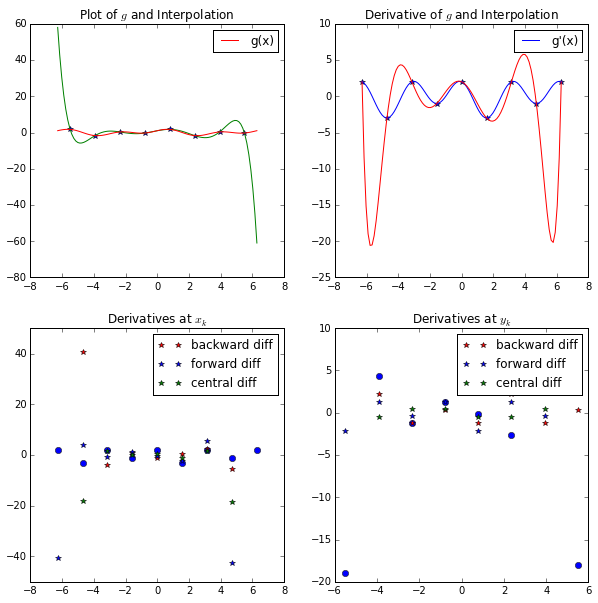

In [8]:
def g(x):
    return numpy.cos(x)+numpy.sin(2*x)

#3. Analytical derivative
def g_prime(x):
    return -numpy.sin(x)+numpy.cos(2.0*x)*2.0 

h=numpy.pi/2.

def backward_diff(x):
    return [(x[k-1]-x[k])/h for k in range(1,len(x))]

def forward_diff(x):
    return [(x[k+1]-x[k])/h for k in range(0,len(x)-1)]

def central_diff(x):
    return [0.5*(x[k+1]-x[k-1])/h for k in range(1,len(x)-1)]

z=numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
y=numpy.asarray([numpy.pi/4+ k*numpy.pi/2 for k in range(-4,4)])
x=numpy.asarray([k*numpy.pi/2 for k in range(-4,5)])

#1. Compute the interpolant
c = numpy.polyfit(y,g(y),7)
p = numpy.poly1d(c)

#2. Evaluate interpolating polynomial PLUS finite differences
#print 'forward diff at x_k:', forward_diff(p(x))
#print 'backward diff at x_k:', backward_diff(p(x))
#print 'central diff at x_k:', central_diff(p(x))


#4. Interpolating polynomial for g prime
d= numpy.polyfit(x,g_prime(x),8)
q= numpy.poly1d(d)

#print 'interpolant of g_prime at x_k:', q(x)

plt.figure(figsize=(10,10), dpi=350)
ax=plt.subplot(221)
ax.plot(y,g(y),'*')
ax.plot(z,p(z))
ax.plot(z,g(z),'r',label="g(x)")
plt.title("Plot of $g$ and Interpolation")
plt.legend()

ax2=plt.subplot(222)
ax2.plot(x,g_prime(x),'*')
ax2.plot(z,g_prime(z),'b',label="g'(x)")
ax2.plot(z,q(z),'-r')
plt.title("Derivative of $g$ and Interpolation")
plt.legend()

ax3=plt.subplot(223)
ax3.plot(x,q(x),'o')
ax3.plot(x[1:],backward_diff(p(x)),'*r', label="backward diff")
ax3.plot(x[:len(x)-1],forward_diff(p(x)),'*b', label="forward diff")
ax3.plot(x[1:len(x)-1],central_diff(p(x)),'*g', label="central diff")
plt.title("Derivatives at $x_k$")
plt.legend()

ax3=plt.subplot(224)
ax3.plot(y,q(y),'o')
ax3.plot(y[1:],backward_diff(p(y)),'*r', label="backward diff")
ax3.plot(y[:len(y)-1],forward_diff(p(y)),'*b', label="forward diff")
ax3.plot(y[1:len(y)-1],central_diff(p(y)),'*g', label="central diff")
plt.title("Derivatives at $y_k$")
plt.legend()